In [5]:
import numpy as np
from quam_libs.components import QuAM, TransmonPair
from quam_libs.experiments.two_qubit_xeb import (
    XEBConfig,
    XEB,
    backend as fake_backend,
    QUAGate,
)

machine = QuAM.load()
qubits = machine.active_qubits
# Get the relevant QuAM components
target_qubit_indices = [3]  # Indices of the target qubits
target_qubits = [qubits[i] for i in target_qubit_indices]
target_qubit_pairs = [
    qubit_pair
    for qubit_pair in machine.active_qubit_pairs
    if qubit_pair.qubit_control in target_qubits and qubit_pair.qubit_target in target_qubits
]


def cz_gate(qubit_pair: TransmonPair):
    """
    CZ gate QUA macro: Add your own QUA code here implementing your CZ gate for any given qubit pair
    :param qubit_pair: TransmonPair instance on which to apply the gate
    :return: None
    """

    pass


cz_qua = QUAGate("cz", cz_gate)

xeb_config = XEBConfig(
    seqs=8, #81,
    # depths=np.arange(1, 2000, 150),
    depths=np.arange(1, 5, 1),
    n_shots=300, #1000,
    qubits=target_qubits,
    qubit_pairs=target_qubit_pairs,
    baseline_gate_name="x90",
    gate_set_choice="sw",
    two_qb_gate=None, #cz_qua,
    save_dir="",
    should_save_data=False, #True,
    generate_new_data=True,
    disjoint_processing=False, #False,
    # reset_method="active",
    # reset_kwargs={"max_tries": 3, "pi_pulse": "x180"},
    reset_method="cooldown", #"active",
    reset_kwargs={"cooldown_time": 50000, "max_tries": 3, "pi_pulse": "x180"},
)

simulate = True  # Set to True to simulate the experiment with Qiskit Aer instead of running it on the QPU
xeb = XEB(xeb_config, quam=machine)
if simulate:
    job = xeb.simulate(backend=fake_backend)
else:
    job = xeb.run(simulate=False)  # If simulate is False, job is run on the QPU, else pulse output is simulated


{'counts': {'1': array([[139, 250,  80, 130],
       [141, 256, 225, 126],
       [162, 149, 298, 166],
       [150, 249,  82, 124],
       [143, 259, 252, 164],
       [134, 149, 293, 161],
       [145, 153, 294, 146],
       [158, 147, 297, 148]]), '0': array([[161,  50, 220, 170],
       [159,  44,  75, 174],
       [138, 151,   2, 134],
       [150,  51, 218, 176],
       [157,  41,  48, 136],
       [166, 151,   7, 139],
       [155, 147,   6, 154],
       [142, 153,   3, 152]])}, 'states': {'state0': array([[0.46333333, 0.83333333, 0.26666667, 0.43333333],
       [0.47      , 0.85333333, 0.75      , 0.42      ],
       [0.54      , 0.49666667, 0.99333333, 0.55333333],
       [0.5       , 0.83      , 0.27333333, 0.41333333],
       [0.47666667, 0.86333333, 0.84      , 0.54666667],
       [0.44666667, 0.49666667, 0.97666667, 0.53666667],
       [0.48333333, 0.51      , 0.98      , 0.48666667],
       [0.52666667, 0.49      , 0.99      , 0.49333333]])}, 'density_matrices': array([[[

/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:635: RuntimeWarning: divide by zero encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:635: RuntimeWarning: invalid value encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:818: RuntimeWarning: Mean of empty slice
  Fxeb = np.nanmean(self.log_fidelities, axis=0)


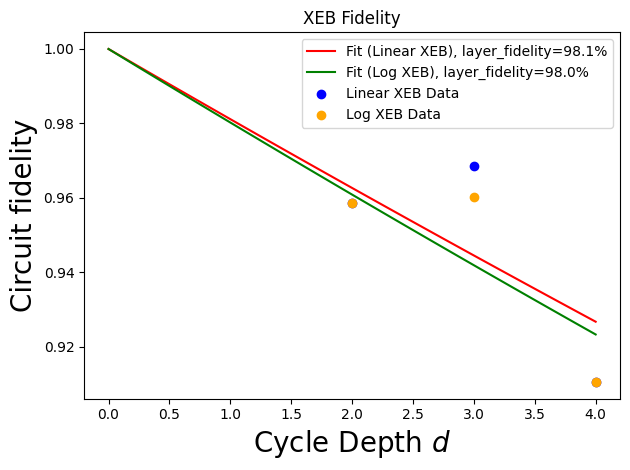

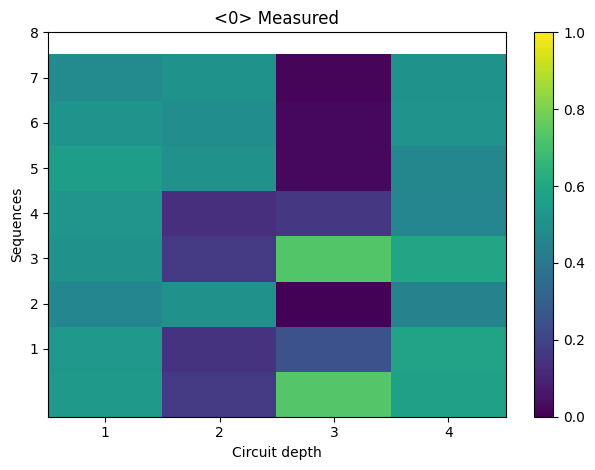

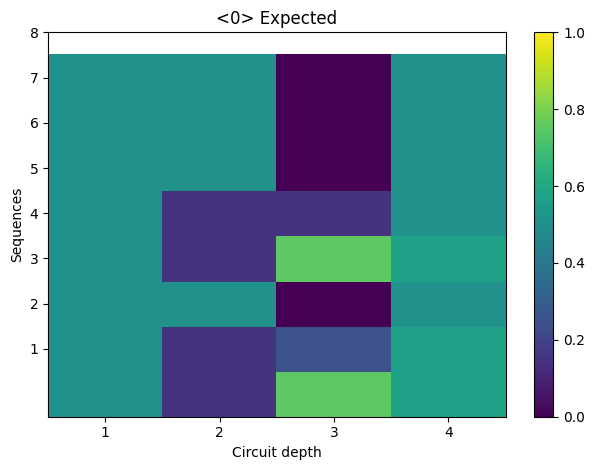

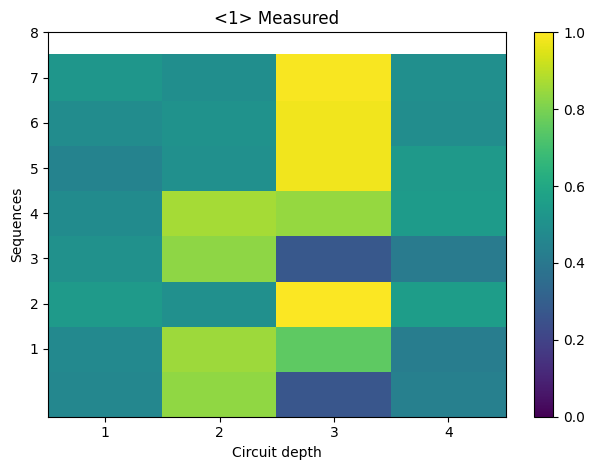

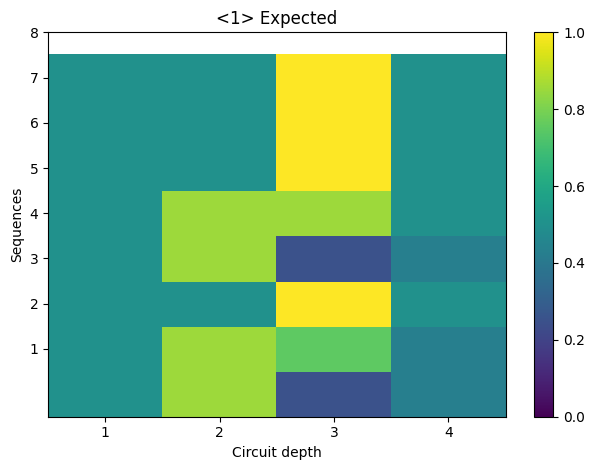

In [6]:

# job.circuits[3][5].draw("mpl")

result = job.result()
print(result.saved_data)

result.plot_fidelities()
# result.plot_records() # bug?
result.plot_state_heatmap()
